In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline


In [9]:
import os
os.getcwd()

'C:\\Users\\DELL\\Desktop'

In [11]:
#Using pandas to read in the dataset and store it as a pandas dataframe.
arise3=pd.read_csv('week3_challenge.csv')

In [12]:
#Data frame head
arise3.head()


,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,...,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id
0,0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,...,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57000,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a
1,1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,...,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN
2,2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,...,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN
3,3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,...,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18,NC_NGA_V2,394.94000,Decline,18a,da360fe9-8e86-4031-afb9-2143a3f734ee
4,4,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,...,114.0,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7,RC_NGA_V1L,423.70578,Decline,NaN,NaN


In [4]:
arise3.isnull().sum()

Unnamed: 0                                        0
createdAt_Month                                   0
Reason                                            0
application_id                                    0
SystemCustomerID                                  0
SystemLoanID                                      0
income_source                                     0
income_verified                                   0
next_loan_number                                  0
country                                           0
DecisionFlag                                      0
Product                                           0
Income                                            0
ID                                                2
ApplicationID                                     2
__v                                               2
CompletedAt                                       2
score                                          5695
demofeatures_debt_to_income_ratio              8840
demofeatures

In [4]:
arise3.info()

NameError: name 'arise3' is not defined

In [5]:
arise3.isnull().sum()

Unnamed: 0                                        0
createdAt_Month                                   0
Reason                                            0
application_id                                    0
SystemCustomerID                                  0
SystemLoanID                                      0
income_source                                     0
income_verified                                   0
next_loan_number                                  0
country                                           0
DecisionFlag                                      0
Product                                           0
Income                                            0
ID                                                2
ApplicationID                                     2
__v                                               2
CompletedAt                                       2
score                                          5695
demofeatures_debt_to_income_ratio              8840
demofeatures

In [5]:
arise3.notnull().sum()

NameError: name 'arise3' is not defined

In [13]:
arise3.shape

(11993, 290)

In [36]:
columns = arise3.columns
percent_missing=arise3.isnull().sum() * 100 / len(arise3)
missing_value_arise3 =pd.DataFrame({'column_name': columns, 'percent_missing':percent_missing})
missing_value_arise3.sort_values('percent_missing', inplace=True)
print(round(percent_missing,2))

Unnamed: 0                                     0.00
createdAt_Month                                0.00
Reason                                         0.00
application_id                                 0.00
SystemCustomerID                               0.00
SystemLoanID                                   0.00
income_source                                  0.00
income_verified                                0.00
next_loan_number                               0.00
country                                        0.00
DecisionFlag                                   0.00
Product                                        0.00
Income                                         0.00
ID                                             0.02
ApplicationID                                  0.02
__v                                            0.02
CompletedAt                                    0.02
score                                         47.49
demofeatures_debt_to_income_ratio             73.71
demofeatures

In [41]:
arise3.isnull().mean() * 100

Unnamed: 0                                     0.000000
createdAt_Month                                0.000000
Reason                                         0.000000
application_id                                 0.000000
SystemCustomerID                               0.000000
SystemLoanID                                   0.000000
income_source                                  0.000000
income_verified                                0.000000
next_loan_number                               0.000000
country                                        0.000000
DecisionFlag                                   0.000000
Product                                        0.000000
Income                                         0.000000
ID                                             0.016676
ApplicationID                                  0.016676
__v                                            0.016676
CompletedAt                                    0.016676
score                                         47

In [14]:
 arise4=arise3[arise3.columns[arise3.isnull().mean()< 0.3]]

In [15]:
arise4.shape

(11993, 272)

In [1]:
arise_num = arise4.select_dtypes(include=[np.number]).copy()

NameError: name 'arise4' is not defined

In [20]:
arise_num.replace(np.nan, 0, inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [21]:
arise_num = StandardScaler().fit_transform(arise_num)

In [109]:
arise_num

array([[-1.73190639, -0.55232728, -0.54258896, ...,  0.00477302,
        -0.00600942,  2.80279656],
       [-1.73161755, -0.62673375,  0.11460488, ...,  1.40880807,
         1.7769575 , -0.14996192],
       [-1.7313287 , -0.6019316 , -0.03291014, ...,  0.50730552,
         0.35561526, -0.97536517],
       ...,
       [ 1.7313287 , -0.65153591, -0.80366353, ..., -0.30082106,
        -0.33383006,  0.20935874],
       [ 1.73161755, -0.6019316 , -1.34902895, ..., -0.06143903,
         0.18816731, -0.81315322],
       [ 1.73190639,  1.65506476,  0.75355488, ..., -0.27365714,
        -0.2009723 , -0.09642634]])

In [22]:
pd.DataFrame(data = arise_num).head()

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,-1.731906,-0.552327,-0.542589,0.488975,-0.389585,2.488673,0.0,0.964747,-1.243848,-0.222474,...,0.016726,-0.218086,-0.113863,0.075120,0.792418,0.703710,0.543044,0.004773,-0.006009,2.802797
1,-1.731618,-0.626734,0.114605,-1.045259,2.823083,0.541326,0.0,0.082888,-1.243848,0.443094,...,1.841329,-0.218086,-0.113863,0.127209,0.709694,0.667245,2.471878,1.408808,1.776958,-0.149962
2,-1.731329,-0.601932,-0.032910,-0.468779,0.681305,-0.115904,0.0,-0.358041,-0.386424,-0.488701,...,0.386796,-0.218086,-0.113863,0.232974,-2.049741,-2.070640,0.543044,0.507306,0.355615,-0.975365
3,-1.731040,-0.552327,-0.887051,0.506051,-0.389585,0.054489,0.0,-0.358041,-1.243848,0.842434,...,-0.463560,0.348488,-0.113863,-0.074673,0.147992,0.250177,-0.411114,-0.417965,-0.436028,0.615854
4,-1.730751,1.655065,0.249922,0.979306,0.681305,-0.432348,0.0,-0.137577,0.471001,-0.222474,...,0.675611,-0.218086,-0.113863,0.015246,0.654783,0.731075,0.286550,0.449582,0.637840,-0.267489


In [23]:
#create pca
pca = PCA(n_components=5)

In [24]:
#fit data to the model
principalComponents = pca.fit_transform(arise_num)

In [25]:
# create dataframe containing principal components
arise_principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [191]:
arise_principalDf.sum()

principal component 1   -1.281462e-10
principal component 2   -5.267037e-13
principal component 3    2.754685e-12
principal component 4   -1.973977e-13
principal component 5   -1.059486e-12
dtype: float64

In [26]:
#variance explained by the first 5 principal components 
pca.explained_variance_ratio_

array([0.35007622, 0.09273704, 0.03771213, 0.03327798, 0.02723908])

In [27]:
#total variance explained by the first 5 principal components 
pca.explained_variance_ratio_.sum()

0.5410424478967681

In [30]:
#Use sklearn’s KMeans function to cluster the numeric PCA dataframe into 3 clusters and plot the clusters.
# using SKmeansdeclare a Kmeans instance with 3 classes
kmeans= KMeans(n_clusters=3, random_state=0).fit(arise_principalDf)


In [31]:
kmeans.fit(arise_principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [37]:
labels = kmeans.labels_
centroids =kmeans.cluster_centers_

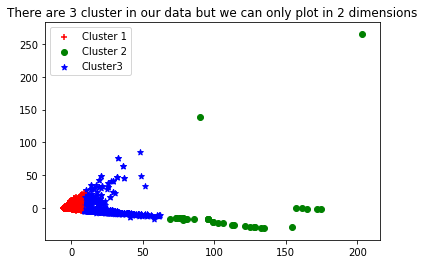

In [38]:
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(arise_principalDf.iloc[i, 0], arise_principalDf.iloc[i, 1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(arise_principalDf.iloc[i, 0], arise_principalDf.iloc[i, 1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(arise_principalDf.iloc[i, 0], arise_principalDf.iloc[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster3'])
plt.title('There are 3 cluster in our data but we can only plot in 2 dimensions')
plt.show()

In [220]:
pd.crosstab(arise3['predictedIncome'], labels)


col_0,0,1,2
predictedIncome,,,
-1.000000,5,1,10
3884.803449,1,0,0
4698.221919,1,0,0
4700.951767,1,0,0
4911.009771,1,0,0
5047.105322,1,0,0
5201.691749,1,0,0
5320.016497,1,0,0
5660.657165,1,0,0


In [33]:
print(type(kmeans))

<class 'sklearn.cluster.k_means_.KMeans'>


In [34]:
pd.groupby(arise3['predictedIncome'], labels)


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


In [48]:
arise_principalDf.groupby('predictedIncome').mean()

KeyError: 'predictedIncome'